##실습 02-04

### 과제1 이 dataset을 오늘 실습한 model로 training해 보자.
#### -- 02_03 코드를 02_03_01로 복사하고 Data set을 위에 있는 np.loadtxt()를 사용하도록 수정하여 실행하자.





In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

## **Mount**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Import aidlutils**

In [0]:
import sys
sys.path.append('/content/drive/Shared drives/scsa_2019_e/aidl-utils/basic')

## **CSV file structure**

- *첫 column = label*
- *나머지 = 이미지 데이타*


In [0]:
!head {'/content/sample_data/mnist_train_small.csv'} #shell cmd 사용

6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,67,67,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,252,252,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,250,232,30,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,222,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,252,183,5,0,0,0,0,0,0,0,20,89,89,73,0,0,0,0,0,0,0,0,0,0,0,0,48,247,252,159,0,0,0,0,0,0,0,79,236,252,252,249,198,16,0,0,0,0,0,0,0,0,0,41,193,252,199,22,0,0,0,0,0,12,135,248,252,252,252,252,252,100,0,0,0,0,0,0,0,0,0,100,252,252,88,0,0,0,0,0,11,171,252,252,235,175,178,252,252,224,0,0,0,0,0,0,0,0,15,209,252,233,12,0,0,0,0,49,177,252,252,89,26,0,2,166,252,252,0,0,0,0,0,0,0,0,96,253,253,59,0,0,0,0,11,177,255,253,92,0,0,0,0,155,253,128,0,0,0,0,0,0,0,0,143,252,252,10,0,0,0,12,171,252,216,110,13,0,0,0,3,180,

In [0]:
mnist_csv_train = '/content/sample_data/mnist_train_small.csv'
minst_csv_test = '/content/sample_data/mnist_test.csv'

In [0]:
import numpy as np

In [0]:
data_train=np.loadtxt(mnist_csv_train, delimiter=',') #delimiter지정필요
data_test=np.loadtxt(minst_csv_test, delimiter=',')

In [0]:
data_train.shape,data_test.shape, type(data_train)

((20000, 785), (10000, 785), numpy.ndarray)

In [0]:
x_train, y_train = data_train[:, 1:], data_train[:, 0] # label 줄을 떼고 처리해 준 것.
x_test, y_test = data_test[:, 1:], data_test[:, 0]

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print (x_train.shape)

(20000, 784)


In [0]:
# add a channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train.shape, x_test.shape

((20000, 784, 1), (10000, 784, 1))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_32 (Conv1D)             (None, 784, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 392, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                125450    
Total params: 125,578
Trainable params: 125,578
Non-trainable params: 0
_________________________________________________________________


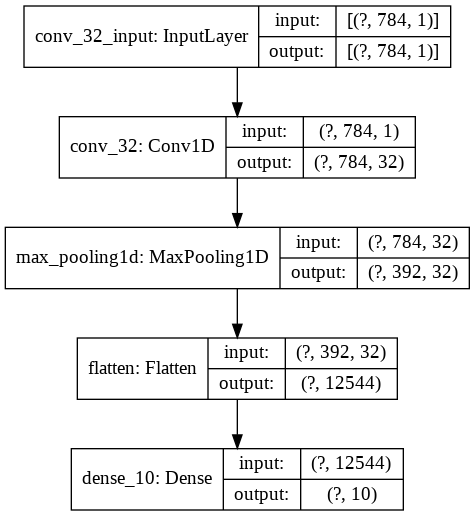

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu', 
                         input_shape=(784, 1), name='conv_32'), # conv layer에서는 4D이기 때문에 무조건 확장해줘야함
  tf.keras.layers.MaxPool1D(pool_size=2, strides=2),
  tf.keras.layers.Flatten(name='flatten'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_10')
])

model.summary()
tf.keras.utils.plot_model(model, 'my_cnn_model.png', show_shapes=True)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
%%time
history = model.fit(x_train, y_train, 
                 batch_size=512, epochs=10,
                 validation_data=(x_test, y_test)
                 )

Train on 20000 samples, validate on 10000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 518us/sample - loss: 1.0851 - accuracy: 0.7634 - val_loss: 0.4675 - val_accuracy: 0.8734
Epoch 2/10
20000/20000 [==============================] - 9s 463us/sample - loss: 0.3970 - accuracy: 0.8894 - val_loss: 0.3275 - val_accuracy: 0.9066
Epoch 3/10
20000/20000 [==============================] - 9s 458us/sample - loss: 0.3071 - accuracy: 0.9122 - val_loss: 0.2853 - val_accuracy: 0.9192
Epoch 4/10
20000/20000 [==============================] - 9s 458us/sample - loss: 0.2686 - accuracy: 0.9233 - val_loss: 0.2548 - val_accuracy: 0.9260
Epoch 5/10
20000/20000 [==============================] - 9s 458us/sample - loss: 0.2401 - accuracy: 0.9302 - val_loss: 0.2352 - val_accuracy: 0.9320
Epoch 6/10
20000/20000 [==============================] - 9s 460us/sample - loss: 0.2194 - accuracy: 0.9362 - val_loss: 0.2278 - val_accuracy: 0.9334
Epoch 7/10
20000/20000 [=========================

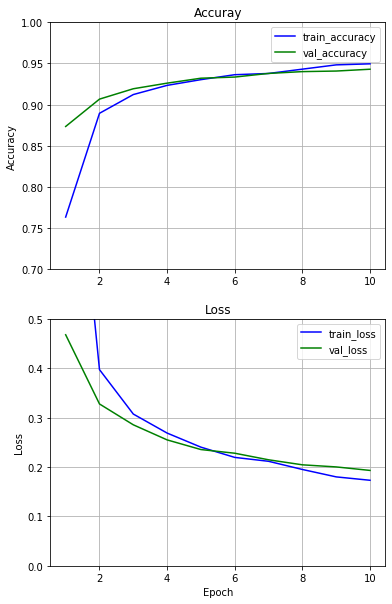

In [0]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')

plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.5])
plt.legend(loc='best')
plt.show()

In [0]:
# 데스트셋 첫 이미지 분류
print(model.predict_classes(x_test[1:2, :]))
print (model.predict_classes(x_test[:1, :], verbose=0))

[2]
[7]


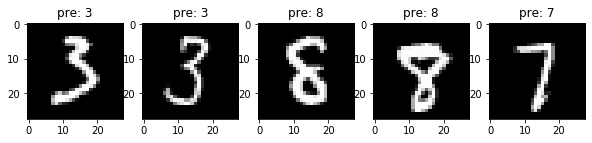

In [0]:
def model_eval(model, n=230):
  #n = 230
  plt.figure(figsize=(10, 2))
  for i in range(5):
    img_idx = n+i
    predict = model.predict(x_test[img_idx:img_idx+1, :])
    img = x_test[img_idx]
    plt.subplot(1,5,i+1)
    plt.imshow(img.reshape((28,28)), cmap='gray')
    plt.title('pre: {}'.format(np.argmax(predict)))

  plt.show()

model_eval(model)

## 실습 02-06
### 과제 1. `ImageDataGenerator()`의 option 값들 바꾸어 결과를 확인하자
### 과제 2. `ImageDataGenerator()`에 여러 option을 넣어 동시에 작동하도록 해보자
###  -- `k_image_process()`를 수정하여 4x3 으로 이미지를 출력해 보자 
#### -- 결과를 확인 하자 : 



1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


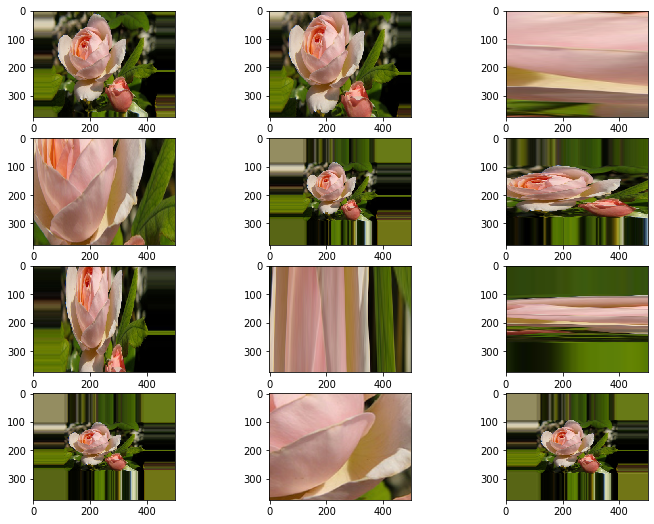

In [0]:
#과제 1
# zoom_range
## zoom_range=0.2 : +-20% 이내에서 random 
## zoom_range=[0.8,1.2] : 80% ~ 120% --> 100% 로 random
datagen = keras.preprocessing.image.ImageDataGenerator(zoom_range=1.2) # zoom_range=[0.8,1.2]
k_image_process(datagen, batch_image)

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


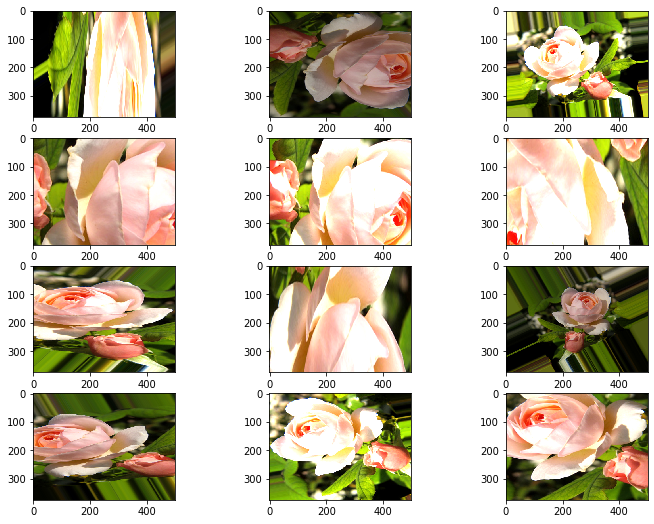

In [0]:
#과제 2
# create image data augmentation generator
datagen = keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.5,2.0], zoom_range=0.8, rotation_range=180, horizontal_flip=True)
k_image_process(datagen, batch_image)

## 실습 03-01
### **실습 과제**
### 결과값을 복사한 것으로 실제 코드 실행을 위해서는 03-01번 ipynb 확인이 필요합니다.

### 과제 1. `timesteps = seq_length = 7`를 줄여보자 
#### -- model_B에서 5,3,1로 줄이고 결과를 비교하자:

5일때의 결과값 : loss: 0.0011 - mse: 0.0011 - val_loss: 7.7446e-04

3일때의 결과값 : loss: 0.0018 - mse: 0.0018 - val_loss: 0.0022 - val_mse: 0.0022

1일때의 결과값 : loss: 0.0010 - mse: 0.0010 - val_loss: 0.0023 - val_mse: 0.0023

시퀀스의 길이가 짧다고 항상 좋은 결과가 잘 나오는 것은 아니다. 특히나 시퀀스가 1인 경우는 사실상 한 단어씩 보는 것이나 마찬가지기 때문에 RNN을 하는 의미가 없다.

In [0]:
#과제 1 5로 줄이기
# sequence generator
timesteps = seq_length = 1 # 시퀀스 데이터를 넣어주는 것이 더 중요하다/
data_dim  = 5
dataX = []
dataY = []
print(len(y))
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length] # 7일치 데이터
    _y = y[i + seq_length]   # 다음날 종가
    dataX.append(_x)
    dataY.append(_y)
print(dataX)
# train data : test data = 7 : 3
train_size = int(len(dataY) * 0.7)
test_size  = len(dataY) - train_size
x_train = np.array(dataX[0:train_size])
y_train = np.array(dataY[0:train_size])
x_test  = np.array(dataX[train_size:len(dataX)])
y_test  = np.array(dataY[train_size:len(dataY)])

732
[array([[0.21375105, 0.20817981, 0.19179183, 0.00046608, 0.1920924 ]]), array([[0.19393503, 0.20364193, 0.20866457, 0.00298467, 0.19655155]]), array([[0.21051645, 0.20528941, 0.20355875, 0.00025993, 0.18774973]]), array([[0.18667876, 0.20948057, 0.20878184, 0.        , 0.21744815]]), array([[0.30697388, 0.31463414, 0.21899367, 0.01247647, 0.21698189]]), array([[0.21914211, 0.26390721, 0.2246864 , 0.45632338, 0.22496747]]), array([[0.23312993, 0.23641916, 0.16268272, 0.57017119, 0.14744274]]), array([[0.13431201, 0.15175877, 0.11617252, 0.39380658, 0.13289962]]), array([[0.13973232, 0.17060429, 0.15860382, 0.28173344, 0.18171679]]), array([[0.18933069, 0.20057799, 0.19187983, 0.29783096, 0.2086465 ]]), array([[0.20500875, 0.19950862, 0.153586  , 0.36110962, 0.14106001]]), array([[0.11044525, 0.12724798, 0.11435324, 0.35107108, 0.11089532]]), array([[0.12705592, 0.1390988 , 0.12324434, 0.23008873, 0.11649107]]), array([[0.12288872, 0.12276776, 0.09067269, 0.34481491, 0.12791587]]), a

In [0]:
hidden_dim = 10

#### Basic LSTM model 
#basic model = LSTM + dense
model_B = tf.keras.models.Sequential(name='model_basic')  
model_B.add(tf.keras.layers.LSTM(units = hidden_dim, 
              input_shape = (x_train.shape[1], x_train.shape[2])))
model_B.add(tf.keras.layers.Dense(units = 1))

#### Advanced model: stacked LSTM
#Advance mode = (LSTM) * 3 + dense
# layer 1
model_A = tf.keras.models.Sequential(name='model_advanced') 
model_A.add(tf.keras.layers.LSTM(units = hidden_dim, # 10개. 
              return_sequences = True, 
              input_shape = (x_train.shape[1], x_train.shape[2])))
# layer 2
model_A.add(tf.keras.layers.LSTM(units = hidden_dim,return_sequences = True)) # return sequence를 true로 해주면 쌓는 것이 가능. Stacked를 만들거라면 쌓아주면 된다.
# layer 3
model_A.add(tf.keras.layers.LSTM(units = hidden_dim))
# dense
model_A.add(tf.keras.layers.Dense(units = 1))

# model summary
model_B.summary()   # basic model
model_A.summary()   # advanced model



Model: "model_basic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________
Model: "model_advanced"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 10)             640       
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
lstm_7 (LSTM)                (None, 10)                840       
_________________________________

In [0]:
%%time
# model compile
model_B.compile(optimizer = 'adam', loss = 'mse', metrics=['mse'])

history_B = model_B.fit(x_train, y_train, 
                      validation_data=(x_test, y_test),
                      epochs = 100, batch_size = 32)

Train on 511 samples, validate on 220 samples
Epoch 1/100
511/511 [==============================] - 2s 4ms/sample - loss: 0.0685 - mse: 0.0685 - val_loss: 0.2497 - val_mse: 0.2497
Epoch 2/100
511/511 [==============================] - 0s 168us/sample - loss: 0.0424 - mse: 0.0424 - val_loss: 0.1617 - val_mse: 0.1617
Epoch 3/100
511/511 [==============================] - 0s 181us/sample - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0945 - val_mse: 0.0945
Epoch 4/100
511/511 [==============================] - 0s 164us/sample - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 5/100
511/511 [==============================] - 0s 163us/sample - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 6/100
511/511 [==============================] - 0s 178us/sample - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 7/100
511/511 [==============================] - 0s 175us/sample - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0123 - val_mse: 0.01

In [0]:
%%time
# model compile
model_A.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

history_A = model_A.fit(x_train, y_train, 
                      validation_data=(x_test, y_test),
                      epochs = 100, batch_size = 32)


Train on 511 samples, validate on 220 samples
Epoch 1/100
511/511 [==============================] - 5s 9ms/sample - loss: 0.1385 - mse: 0.1385 - val_loss: 0.5668 - val_mse: 0.5668
Epoch 2/100
511/511 [==============================] - 0s 264us/sample - loss: 0.1185 - mse: 0.1185 - val_loss: 0.5044 - val_mse: 0.5044
Epoch 3/100
511/511 [==============================] - 0s 259us/sample - loss: 0.0970 - mse: 0.0970 - val_loss: 0.4288 - val_mse: 0.4288
Epoch 4/100
511/511 [==============================] - 0s 277us/sample - loss: 0.0737 - mse: 0.0737 - val_loss: 0.3329 - val_mse: 0.3329
Epoch 5/100
511/511 [==============================] - 0s 265us/sample - loss: 0.0507 - mse: 0.0507 - val_loss: 0.2149 - val_mse: 0.2149
Epoch 6/100
511/511 [==============================] - 0s 252us/sample - loss: 0.0327 - mse: 0.0327 - val_loss: 0.1091 - val_mse: 0.1091
Epoch 7/100
511/511 [==============================] - 0s 260us/sample - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0599 - val_mse: 0.05

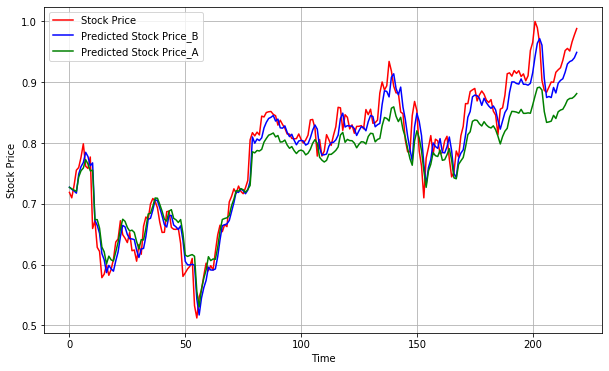

In [0]:
predicted_stock_price_B = model_B.predict(x_test)
predicted_stock_price_A = model_A.predict(x_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price_B, color = 'blue', label = 'Predicted Stock Price_B')
plt.plot(predicted_stock_price_A, color = 'green', label = 'Predicted Stock Price_A')
#plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

### 과제 2. model_A를 교재와 같이 확장시켜 model_A2를 만들어 보자
#### -- dropout layer를 추가하고, 
#### -- LSTM layer도 추가하자
#### -- 결과를 model_B,A,A2에 대해 비교하자:






In [0]:
model_A2 = tf.keras.models.Sequential(name='model_advanced2')
model_A2.add(tf.keras.layers.LSTM(units=hidden_dim, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_A2.add(tf.keras.layers.Dropout(rate=0.2))

model_A2.add(tf.keras.layers.LSTM(units=hidden_dim, return_sequences=True))
model_A2.add(tf.keras.layers.Dropout(rate=0.2))

model_A2.add(tf.keras.layers.LSTM(units=hidden_dim, return_sequences=True))
model_A2.add(tf.keras.layers.Dropout(rate=0.2))

model_A2.add(tf.keras.layers.LSTM(units=hidden_dim, return_sequences=True))
model_A2.add(tf.keras.layers.Dropout(rate=0.2))

model_A2.add(tf.keras.layers.Dense(units=1))

model_A2.summary()

Model: "model_advanced2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 10)             640       
_________________________________________________________________
dropout (Dropout)            (None, 1, 10)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 10)             840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 1, 10)         

In [0]:
model_A2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

history_A2 = model_A2.fit(x_train, y_train, 
                      validation_data=(x_test, y_test),
                      epochs = 100, batch_size = 32)


Train on 511 samples, validate on 220 samples
Epoch 1/100
511/511 [==============================] - 6s 13ms/sample - loss: 0.1391 - mse: 0.1391 - val_loss: 0.5709 - val_mse: 0.5709
Epoch 2/100
511/511 [==============================] - 0s 338us/sample - loss: 0.1188 - mse: 0.1188 - val_loss: 0.5129 - val_mse: 0.5129
Epoch 3/100
511/511 [==============================] - 0s 309us/sample - loss: 0.0985 - mse: 0.0985 - val_loss: 0.4474 - val_mse: 0.4474
Epoch 4/100
511/511 [==============================] - 0s 326us/sample - loss: 0.0786 - mse: 0.0786 - val_loss: 0.3703 - val_mse: 0.3703
Epoch 5/100
511/511 [==============================] - 0s 324us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.2726 - val_mse: 0.2726
Epoch 6/100
511/511 [==============================] - 0s 348us/sample - loss: 0.0454 - mse: 0.0454 - val_loss: 0.1745 - val_mse: 0.1745
Epoch 7/100
511/511 [==============================] - 0s 354us/sample - loss: 0.0399 - mse: 0.0399 - val_loss: 0.1195 - val_mse: 0.1

(220, 1)
(220, 1)


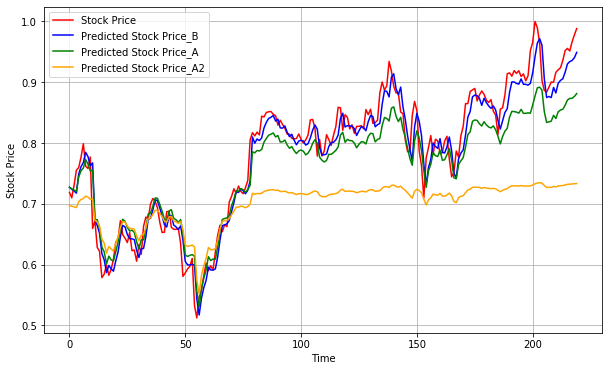

In [0]:
predicted_stock_price_B = model_B.predict(x_test)
predicted_stock_price_A = model_A.predict(x_test)
predicted_stock_price_A2 = model_A2.predict(x_test).reshape(-1, 1)#.squeeze()
print(predicted_stock_price_A.shape)
print(predicted_stock_price_A2.shape)
plt.figure(figsize=(10, 6))
plt.plot(y_test, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price_B, color = 'blue', label = 'Predicted Stock Price_B')
plt.plot(predicted_stock_price_A, color = 'green', label = 'Predicted Stock Price_A')
plt.plot(predicted_stock_price_A2, color = 'orange', label = 'Predicted Stock Price_A2')
#plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

모델 A는 모델 B보다 모델 B는 모델 A2보다 더 나쁜것을 확인할 수 있었습니다.

model_B의 valid mse는 5.9098e-04로 가장 높은 정확도를 보였으며, model_A의 경우에는 0.0015로 그 다음으로 높은 정확도를, 마지막으로 model_A2는 0.0145로 가장 나쁜 결과를 보여줍니다.

이러한 결과가 보여주는 것은 단순히 레이어를 많이 쌓는 것이 좋은 결과를 보장한다는 것은 아니라는 것, 그리고 레이어를 설정해줄때는 모델의 특성을 잘 고려해서 설계해줘야한다는 점입니다.

랜덤한 성향이 강한 주식 그래프의 경우에는 레이어를 많이 쌓고, 드랍아웃을 넣는다고 더 좋아지는 것은 아니라는 사실을 보여줍니다.

##실습 03-02

### 과제 1. 더 긴문장을 생성하도록 해보자
####-- 학습문장이 " ...  immensity of the sea."로 끝났다. 첫번째 생성문장이 뒷부분이 이상하다. 180자로 학습한 한계 때문일까? 
#### -- 학습문장 전체를 한번더 반복하여 학습문장을 360자로 확장하고 결과를 비교해 보자



#### -- 결과를 분석하자: 






1번의 경우 180자 이후부터 다시 처음부터 문장이 시작되는 것을 확인할 수 있다.

결과적으로 기존의 가장 끝 단어가 나타난 이후 모델이 학습한 것은 다시 처음부터 이어지는 문장이다. 그렇기 때문에 내부에서 LSTM 을 통해서 학습하는 과정에서 . 이후의 다음 문장은 복사 붙여넣기 한 첫 if가 나오는 것이라고 학습하고, 이를 학습한대로 뱉어낸 것이라 생각된다.

### 과제 2. 세번째 생성문장은 여전히 문제가 많다. 모델을 개선해 보자 
####-- LSTM layer를 추가해 보자 
####-- 더 무엇을 해볼까? 생각해 보자
####-- 결과를 분석하자:

LSTM layer를 추가한다고 좋은 결과가 나오는 것은 아니라는 사실을 위에 새롭게 layer를 더해서 수정한 코드를 보면 알 수 있다.

이유는 지금의 코드는 앞전의 글자들이 나올 때 마지막 글자가 어떤 글자가 나오는 것이 좋은지 그 확률을 계산하고 있다.

즉 전체 시퀀스, 각 글자간 어떻게 연결되고 있는지를 확인하고 있는 것이 아니기 때문에 문장이 구성되는 것을 신경쓰지 않고 아무 글자나 해당 위치에 나오기 가장 적합한 글자를 뱉어내고 있는 것이다.

이를 해결하기 위해서는 시퀀스의 셀들이 모두 결과를 꺼내도록 해야한다. 즉, return_sequences를 True로 바꿔야 하는 것이다.

## 실습 3-2-1

### 과제 1. 학습문장을 Keras Documents에서 2000자 정도 가져다 넣어서 실행해 보자('.'뒤에'\n'도 넣어주자) 
#### -- accuracy가 적당한가 확인하자.
#### -- 모델을 강화 하기 위해 `hidden_dim ='값을 150으로 높히고, 
#### -- `#`로 막혀 있는 `BatchNormalization()`을 동작시켜 보자
#### -- `Trigger characters`를 다양하게 바꿔보자 
#### -- 결과를 확인하고, 분석해 보자:
 


위에 있는 것들을 다 종합해본 결과 accuracy의 경우에는 약 80 퍼센트 선에서 진동하는 것을 확인할 수 있었다.

관찰결과 짧은 단어나 낱개의 알파벳의 경우에는 비교적 정상적으로 문장을 출력하는 것을 확인할 수 있었다. 

aaaaaaaaaaaa와 같은 이상한 시작의 경우에는 처음 단어는 제대로 뽑아내지 못했으나 그 이후부터는 비교적 제대로 뽑아내는 것을 확인할 수 있었다.

다만 hi로 시작하는 문장의 경우에는 이상한 점을 발견할 수 있었는데, 후반부에 계속해서 같은 문장이 반복하는 것이었다. 

이는 가장 마지막에 문장의 중간 부분을 테스트한 경우에도 발견됐는데, 이러한 문제점이 공통적으로 발견되는 지점은 so is useful in 이라는 문장이었다.

추정하건데, useful in 이라는 맥락이 등장한 이후에 가장 자주 나온 것이 chinese라는 단어로 시작하는 문장이었고, 학습의 데이터가 제한적이다 보니 useful as와 같은 다른 가능성이 있음에도 가장 높은 가능성을 보이는 chinese 문장이 계속해서 반복적으로 나타난 것이 아닌가 추측해본다.

##실습 03-03

### 과제 1. `model_R.fit()`에서 `batch_size=`와 `epochs='값을 조정하여 최적의 값을 찾아 보자
#### -- batch_size 를 32,128,512,1024로 바꾸면서 accuracy값을 비교해 보자 
#### -- 최고의 결과를 낼 batch_size를 예상하고 그 이유를 적어보자 
#### -- 실험 결과와 예상결과를 비교하고, 분석하자 : 



 

### 과제 2. epochs를 30,100,200등으로 바꾸어 보자 
####-- batch_size도 같이 조정하여 최적의 조건을 찾아보자 : 


##과제 1 및 2답안

batch_size가 작은 방향으로 갔을 때 조금 더 좋은 값으로 가지 않을까 싶습니다.

돌려봤을 때 64 가량에서 효율이 제일 괜찮게 나왔고, batch size가 200 선 일때 88.38로 valid accuracy가 가장 높은 값이 나오는 것을 확인했습니다. epoch와 batch 사이즈 간에도 상관관계가 있어 보이는 것이, batch_size가 64보다 작은 경우에는 epoch를 늘렸을 때 그 결과값이 87.08~88.12(batch_size==32)로 뚜렷한 증가추세를 보인 반면 64보다 큰 경우에는 85.18~87.15(batch_size==1024)로 상대적으로 증가 추세가 둔감화되는 것을 확인할 수 있었습니다. 

즉 데이터를 학습시키는 총량이 정해져 있을 때 batch_size와 epoch간에 적정한 최적값이 있다는 것을 알 수 있고, 이 경우에는 batch_size가 64, epoch가 200인 경우임을 알 수 있다.

다만 이 이상 학습 시켰을 때 더 이상 효용을 보지 못할 것으로 보인다. 그 근거로 들 수 있는 것 중 하나는 학습 효율의 향상이다. batch_size가 64, epoch가 150일 때 valid accuracy가 88.34, epoch가 200일때 valid accuracy가 88.35로 사실상 학습 효율이 임계에 달했음을 확인할 수 있다.

이를 통해서 알 수 있는 것은 각 데이터간에 loss function을 계산해 cost를 도출해내는 과정에서 본 데이터의 경우에는 batch_size를 64로 할때 그 오차를 최소화할 수 있다는 것이고, epoch의 경우에는 사실상 200선이 최대로, 그 이상으로 올라갈 경우에는 학습 효율을 기대할 수 없을 것으로 보이며, 오히려 오버 피팅이 일어날 것으로 생각된다.


